# Optimizer Example
MNIST ANN example showing comparison between *newer* optimizers that appeared *after* Adam.. This is a classification problem.

Richard Henry, 15-Jul-2024 

Adapted from mvsjober on Github.
https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/keras-mnist-mlp.ipynb

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|ANN|Modern|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(64, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(mClass, 
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, Adam

In [7]:
%%time
h0=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7508 - loss: 0.8192 - val_accuracy: 0.9563 - val_loss: 0.1561
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9291 - loss: 0.2382 - val_accuracy: 0.9687 - val_loss: 0.1092
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9479 - loss: 0.1723 - val_accuracy: 0.9753 - val_loss: 0.0842
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1407 - val_accuracy: 0.9727 - val_loss: 0.0846
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1206 - val_accuracy: 0.9790 - val_loss: 0.0723
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1030 - val_accuracy: 0.9785 - val_loss: 0.0710
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0947 - val_accuracy: 0.9792 - val_loss: 0.0714
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0876 - v

### Second Model, Adam + Weight Decay

In [8]:
%%time
h1=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7556 - loss: 0.7901 - val_accuracy: 0.9543 - val_loss: 0.1556
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9290 - loss: 0.2402 - val_accuracy: 0.9685 - val_loss: 0.1090
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9475 - loss: 0.1754 - val_accuracy: 0.9747 - val_loss: 0.0883
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1430 - val_accuracy: 0.9745 - val_loss: 0.0809
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9625 - loss: 0.1233 - val_accuracy: 0.9765 - val_loss: 0.0769
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1076 - val_accuracy: 0.9770 - val_loss: 0.0751
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0957 - val_accuracy: 0.9798 - val_loss: 0.0691
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0866 - v

### Third Model, AdaFactor

In [9]:
%%time
h2=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3704 - loss: 1.9056 - val_accuracy: 0.8527 - val_loss: 0.6563
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7661 - loss: 0.7740 - val_accuracy: 0.9070 - val_loss: 0.3689
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.5448 - val_accuracy: 0.9253 - val_loss: 0.2813
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.4436 - val_accuracy: 0.9350 - val_loss: 0.2381
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.3924 - val_accuracy: 0.9413 - val_loss: 0.2129
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.3530 - val_accuracy: 0.9463 - val_loss: 0.1936
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.3267 - val_accuracy: 0.9507 - val_loss: 0.1775
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9114 - loss: 0.2997 - v

### 4th Model, LION

In [10]:
%%time
h3=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7742 - loss: 0.7089 - val_accuracy: 0.9637 - val_loss: 0.1303
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.2307 - val_accuracy: 0.9647 - val_loss: 0.1156
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.2132 - val_accuracy: 0.9703 - val_loss: 0.1133
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9433 - loss: 0.1946 - val_accuracy: 0.9697 - val_loss: 0.1097
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1932 - val_accuracy: 0.9690 - val_loss: 0.1081
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9484 - loss: 0.1849 - val_accuracy: 0.9690 - val_loss: 0.1206
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9514 - loss: 0.1795 - val_accuracy: 0.9720 - val_loss: 0.1108
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9521 - loss: 0.1757 - v

### 5th Model, Adam with Nesterov Momentum

In [11]:
%%time
h4=model_build('nadam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7485 - loss: 0.8156 - val_accuracy: 0.9583 - val_loss: 0.1457
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9307 - loss: 0.2316 - val_accuracy: 0.9690 - val_loss: 0.1076
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9477 - loss: 0.1733 - val_accuracy: 0.9733 - val_loss: 0.0899
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9578 - loss: 0.1388 - val_accuracy: 0.9738 - val_loss: 0.0890
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1197 - val_accuracy: 0.9793 - val_loss: 0.0759
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9681 - loss: 0.1042 - val_accuracy: 0.9787 - val_loss: 0.0720
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.0946 - val_accuracy: 0.9792 - val_loss: 0.0716
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0840 - v

### 6th Model, Follow the Regularized Leader

In [12]:
%%time
h5=model_build('ftrl',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1135 - loss: 2.3040 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3018 - v

### 7th Model, AdaMax

In [13]:
%%time
h6=model_build('adamax',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6687 - loss: 1.0599 - val_accuracy: 0.9310 - val_loss: 0.2415
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8918 - loss: 0.3695 - val_accuracy: 0.9477 - val_loss: 0.1757
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9171 - loss: 0.2857 - val_accuracy: 0.9573 - val_loss: 0.1432
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.2396 - val_accuracy: 0.9648 - val_loss: 0.1240
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9400 - loss: 0.2056 - val_accuracy: 0.9690 - val_loss: 0.1108
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9463 - loss: 0.1889 - val_accuracy: 0.9707 - val_loss: 0.1033
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9490 - loss: 0.1717 - val_accuracy: 0.9740 - val_loss: 0.0947
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1581 - v

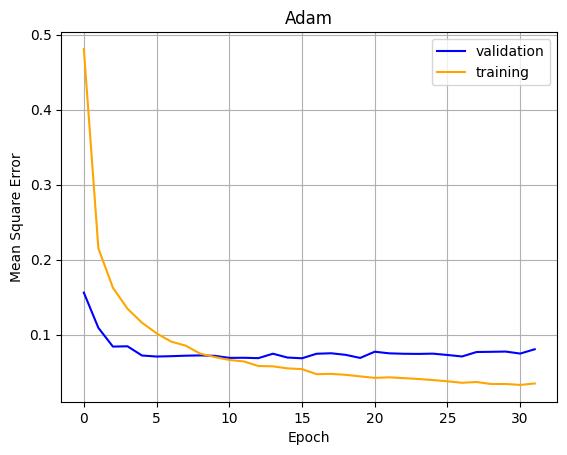

In [14]:
plt.plot(h0.history['val_loss'], color='blue')
plt.plot(h0.history['loss'], color='orange')
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam')
plt.grid()
plt.show()

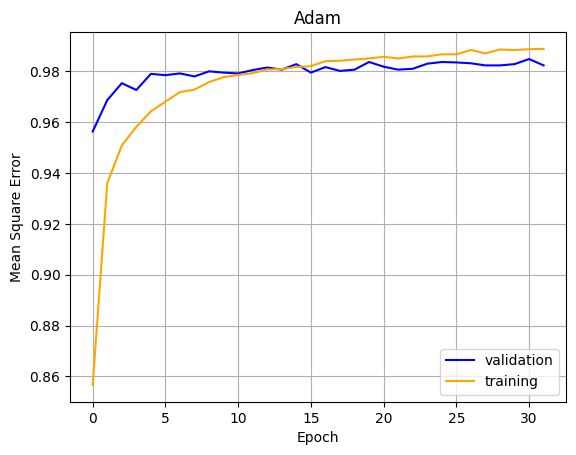

In [15]:
plt.plot(h0.history['val_accuracy'], color='blue')
plt.plot(h0.history['accuracy'], color='orange')
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam')
plt.grid()
plt.show()

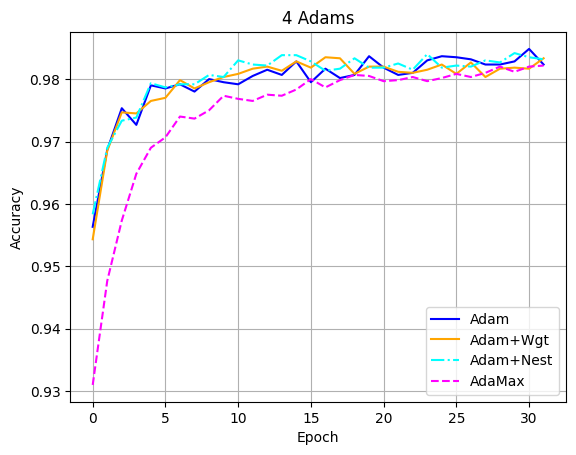

In [17]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h6.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams')
plt.grid()
plt.show()

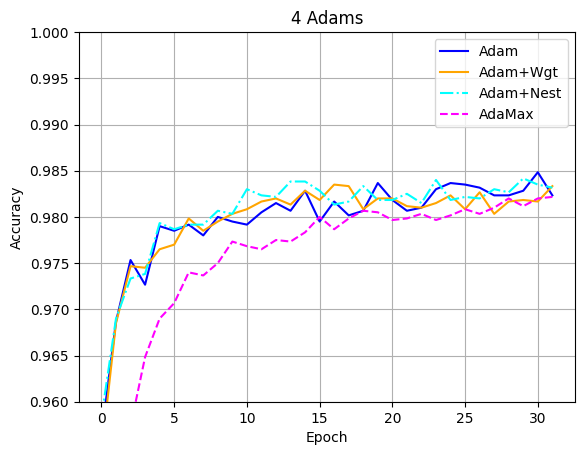

In [20]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h6.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams')
plt.ylim([0.96,1.00])
plt.grid()
plt.show()

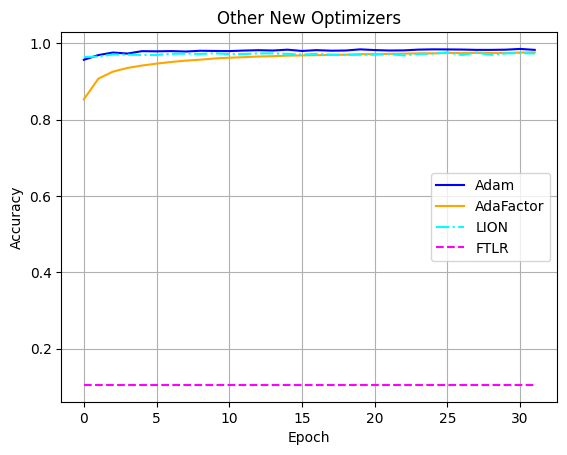

In [18]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h3.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h5.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTLR'])
plt.title('Other New Optimizers')
plt.grid()
plt.show()

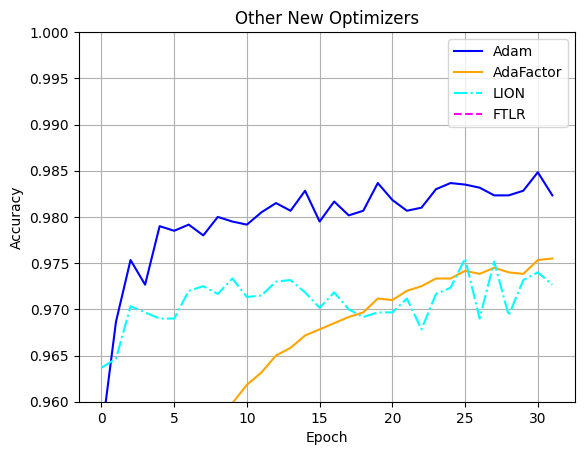

In [22]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h3.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h5.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTLR'])
plt.title('Other New Optimizers')
plt.ylim([0.96,1.00])
plt.grid()
plt.show()

In [16]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)